In [108]:
import pandas as pd
covid=pd.read_csv("03-30-2020.csv")

In [109]:
covid.shape

(3439, 12)

In [110]:
covid.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-30 22:52:45,34.223334,-82.461707,3,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-30 22:52:45,30.295065,-92.414197,11,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-30 22:52:45,37.767072,-75.632346,6,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-30 22:52:45,43.452658,-116.241552,113,2,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-30 22:52:45,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [112]:
covid_US=covid[covid['Country_Region']=='US']

In [123]:
import pandasql as ps
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
covid_US_STATES=pysqldf("SELECT Country_Region,Province_State,sum(Confirmed) as Confirmed,sum(Deaths) as Deaths from covid_US group by Country_Region,Province_State ;")

In [129]:
covid_US_STATES.head()

,Country_Region,Province_State,Confirmed,Deaths
0,US,Alabama,899,10
1,US,Alaska,114,3
2,US,American Samoa,0,0
3,US,Arizona,1157,20
4,US,Arkansas,473,7


## State wise cases

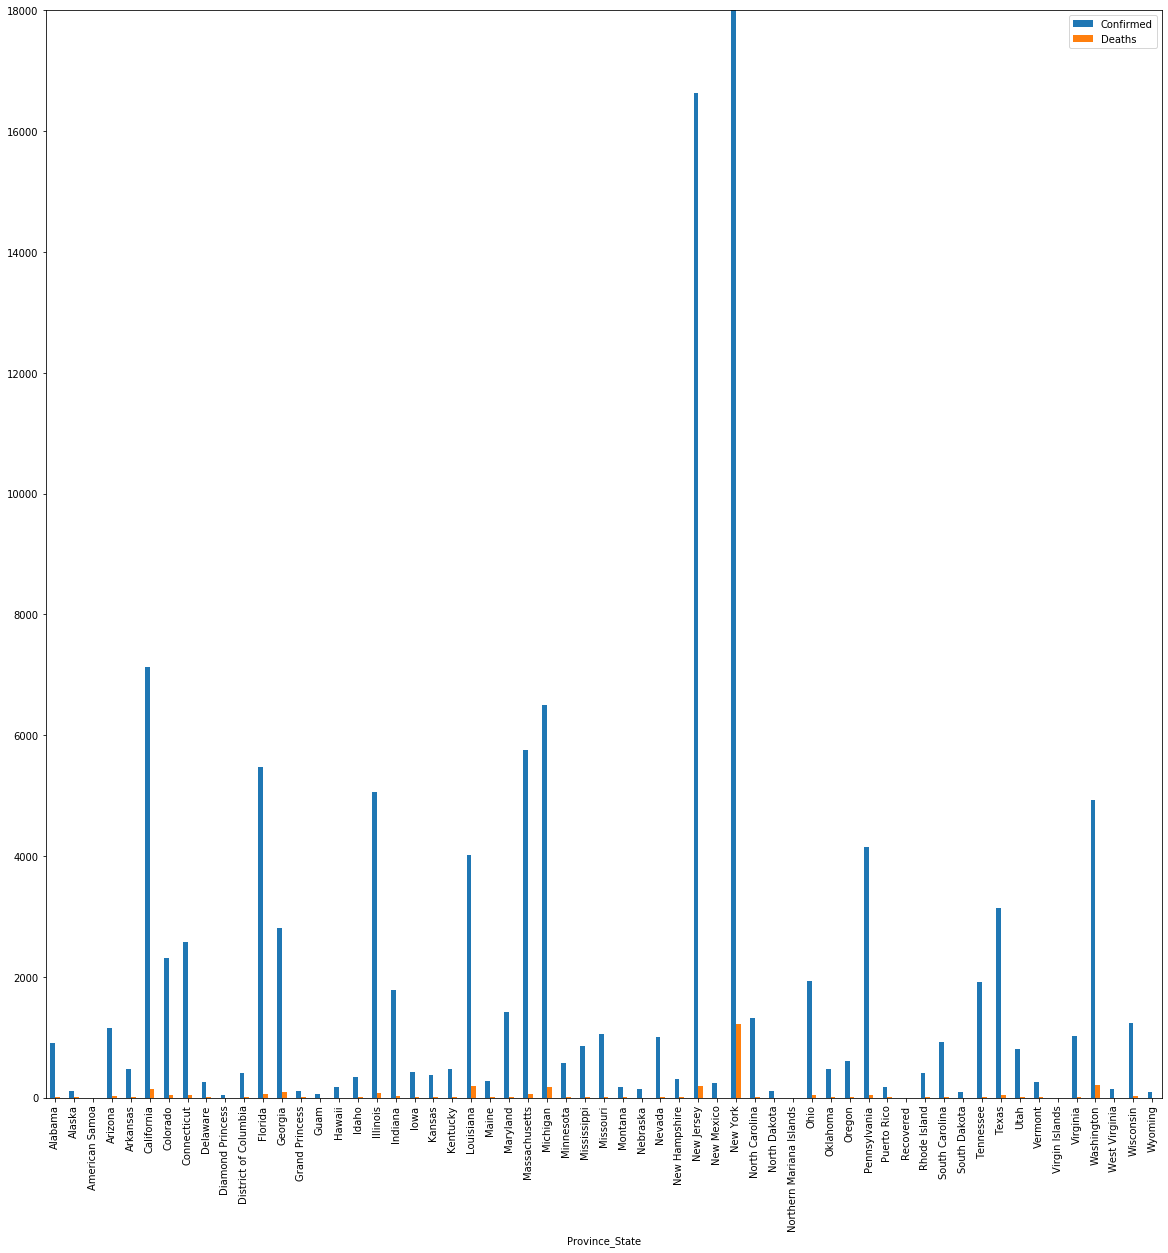

In [132]:
covid_US_STATES.plot(x='Province_State',y=['Confirmed','Deaths'],kind='bar',figsize=(20,20),ylim=(0,18000))

## Selecting the states of  California, Florida, New Jersey, New York, Texas

In [137]:
covid_5_US_STATES=pysqldf("SELECT Country_Region,Province_State,sum(Confirmed) as Confirmed,sum(Deaths) as Deaths from covid_US where Province_State in ('Texas','California','New Jersey','New York','Florida') group by Country_Region,Province_State ;")

In [138]:
covid_5_US_STATES.head()

,Country_Region,Province_State,Confirmed,Deaths
0,US,California,7138,146
1,US,Florida,5473,63
2,US,New Jersey,16636,198
3,US,New York,66663,1218
4,US,Texas,3147,45


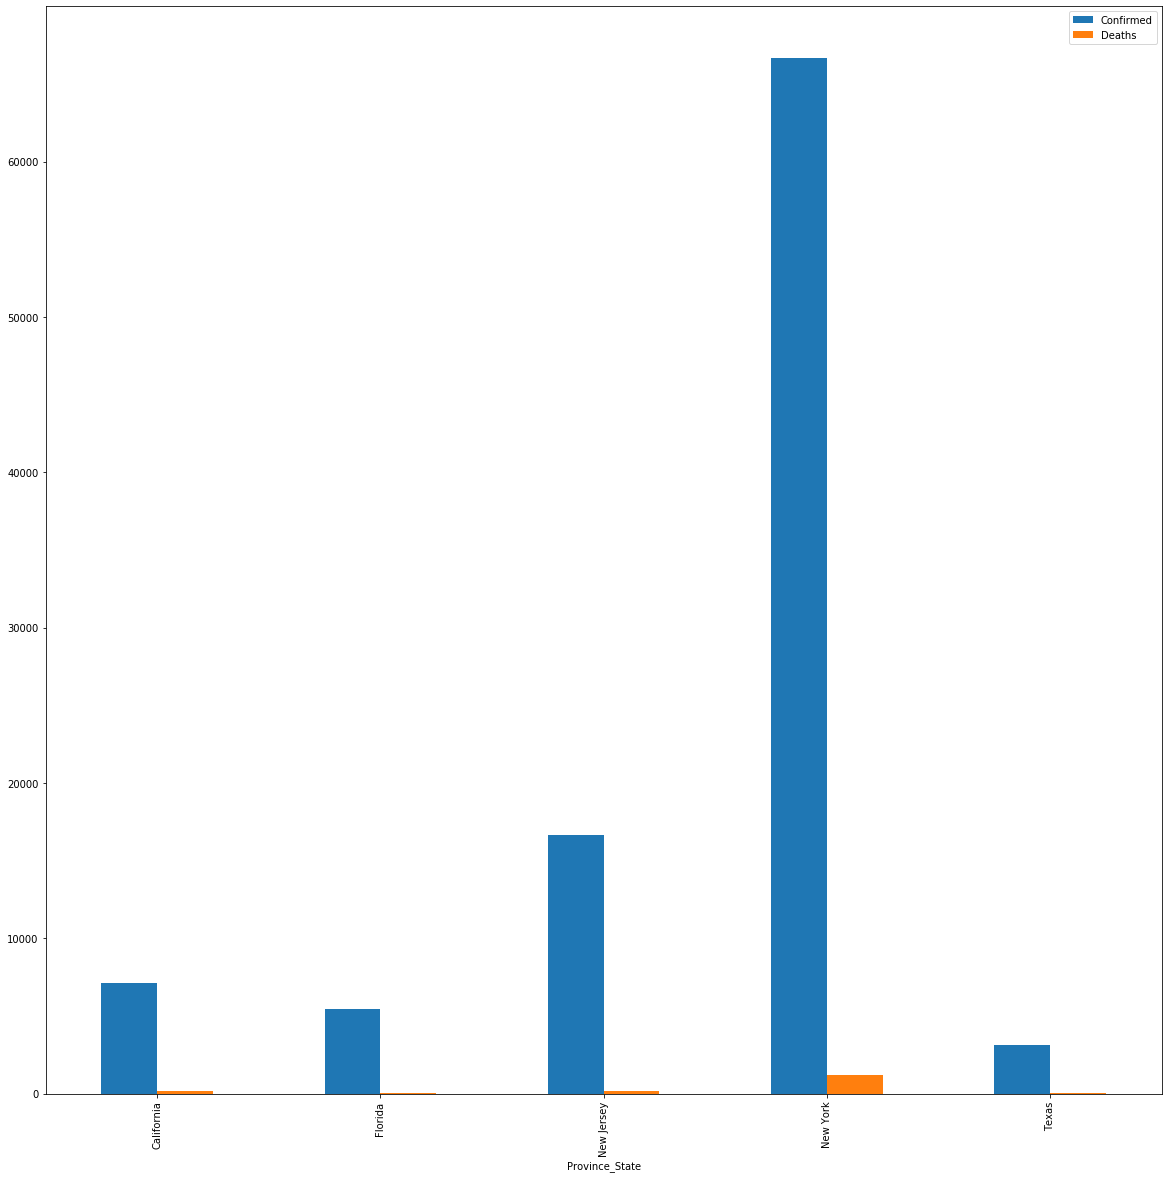

In [140]:
covid_5_US_STATES.plot(x='Province_State',y=['Confirmed','Deaths'],kind='bar',figsize=(20,20))